# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   (https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [396]:
import pandas as pd              
import numpy as np               
import matplotlib.pyplot as plt    
import seaborn as sns              
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score    
from sklearn.model_selection import train_test_split    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, f1_score 
from yellowbrick.cluster import KElbowVisualizer  

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [397]:
file_path = "bank_transactions_data_2.csv" 
data = pd.read_csv(file_path)  

# Menampilkan informasi dasar dataset
print(data.info())  

# Menampilkan 5 baris pertama dari dataset
print(data.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [398]:
# 1. Memahami Struktur Data  
print("Dataset Info:")  
print(data.info())  

# Menampilkan statistik deskriptif untuk kolom numerik  
print("\nDescriptive statistics:")  
print(data.describe(include='all'))  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBal

In [399]:
# 2. Menangani Data yang Hilang  
missing_values = data.isnull().sum()  
print("\nMissing Values:")  
print(missing_values[missing_values > 0])  



Missing Values:
Series([], dtype: int64)


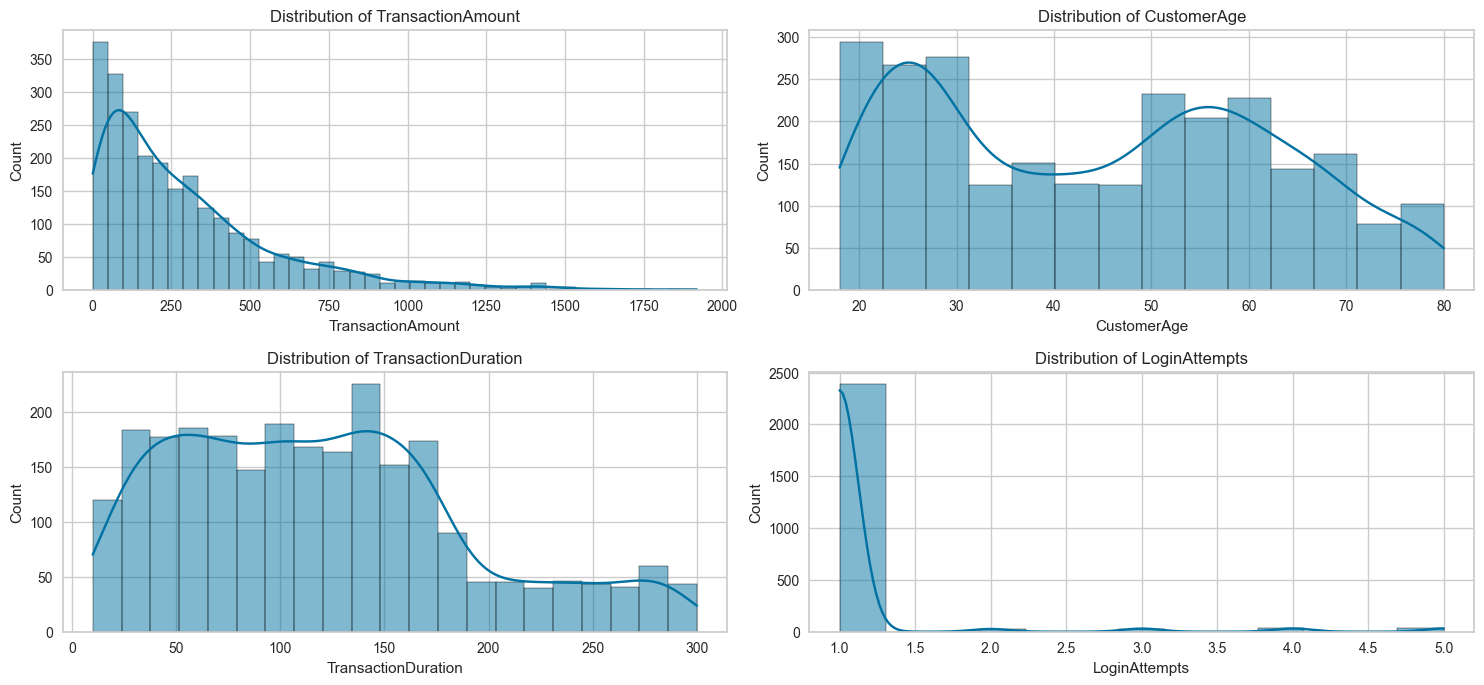

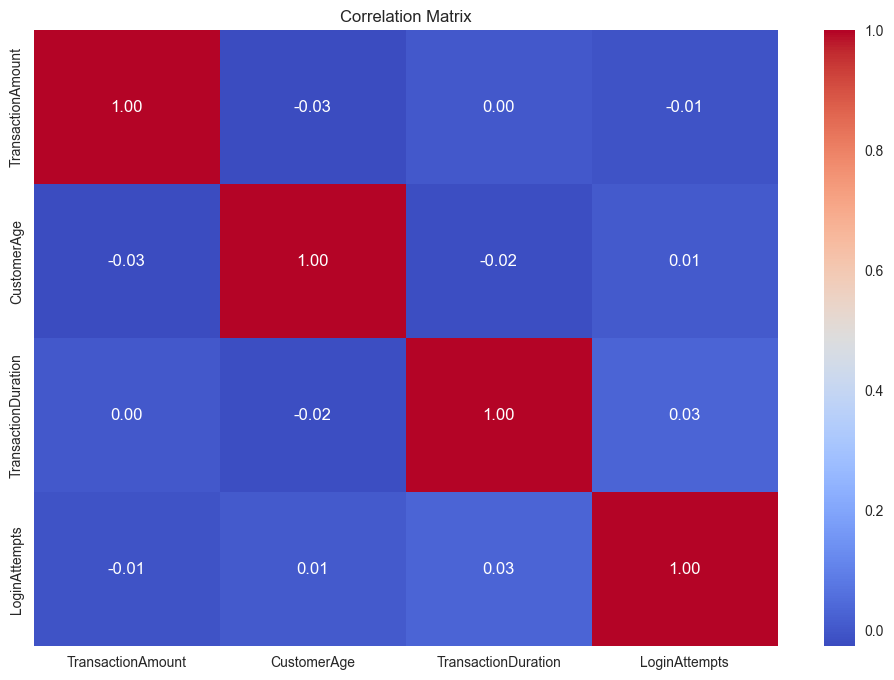

In [400]:
# 3. Analisis Distribusi dan Korelasi  
# Histogram untuk variabel numerik  
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()  

plt.figure(figsize=(15, 10))  
for i, column in enumerate(numerical_features, 1):  
    plt.subplot(3, 2, i)  
    sns.histplot(data[column], kde=True)  
    plt.title(f'Distribution of {column}')  
plt.tight_layout()  
plt.show()  

# Korelasi antar variabel  
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()  
plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  
plt.title('Correlation Matrix')  
plt.show()  


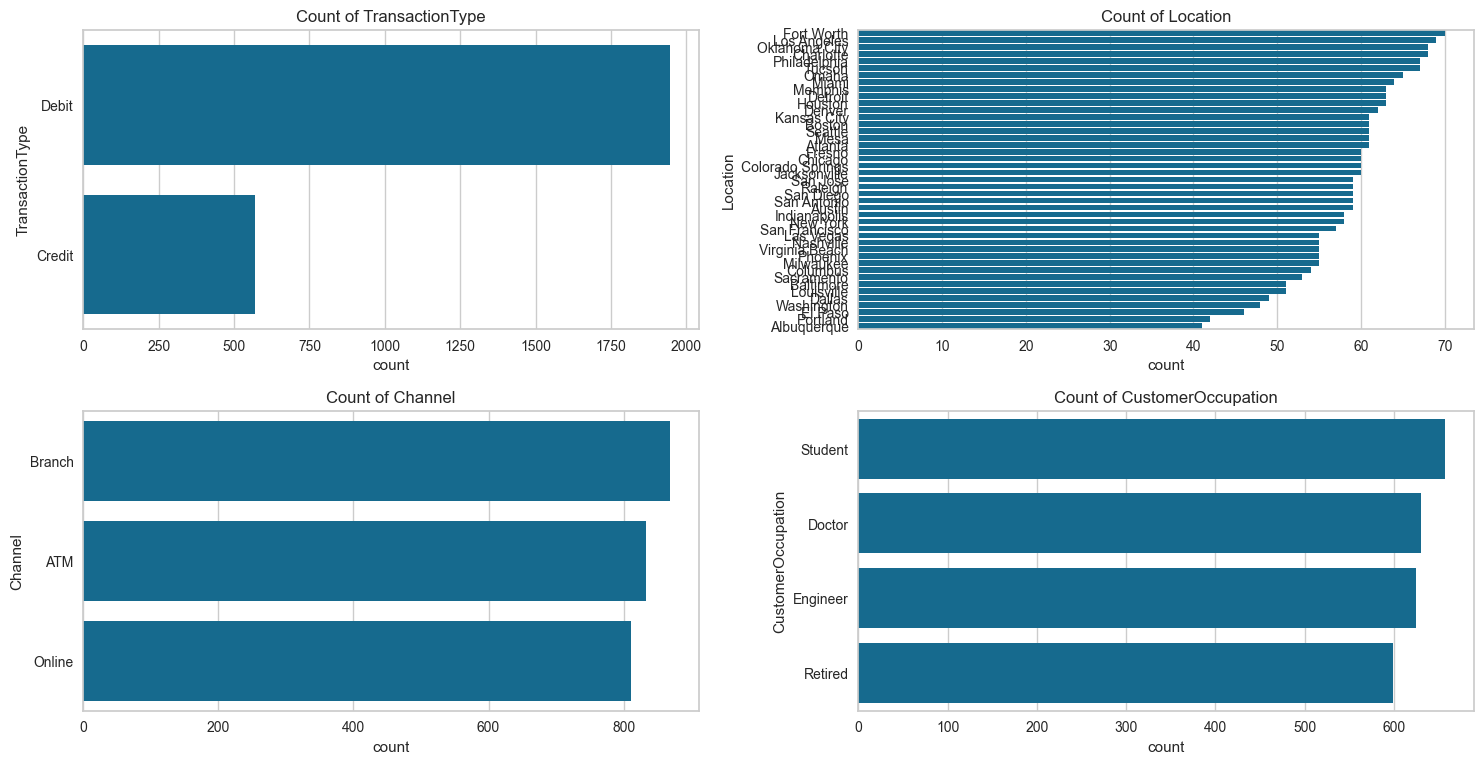

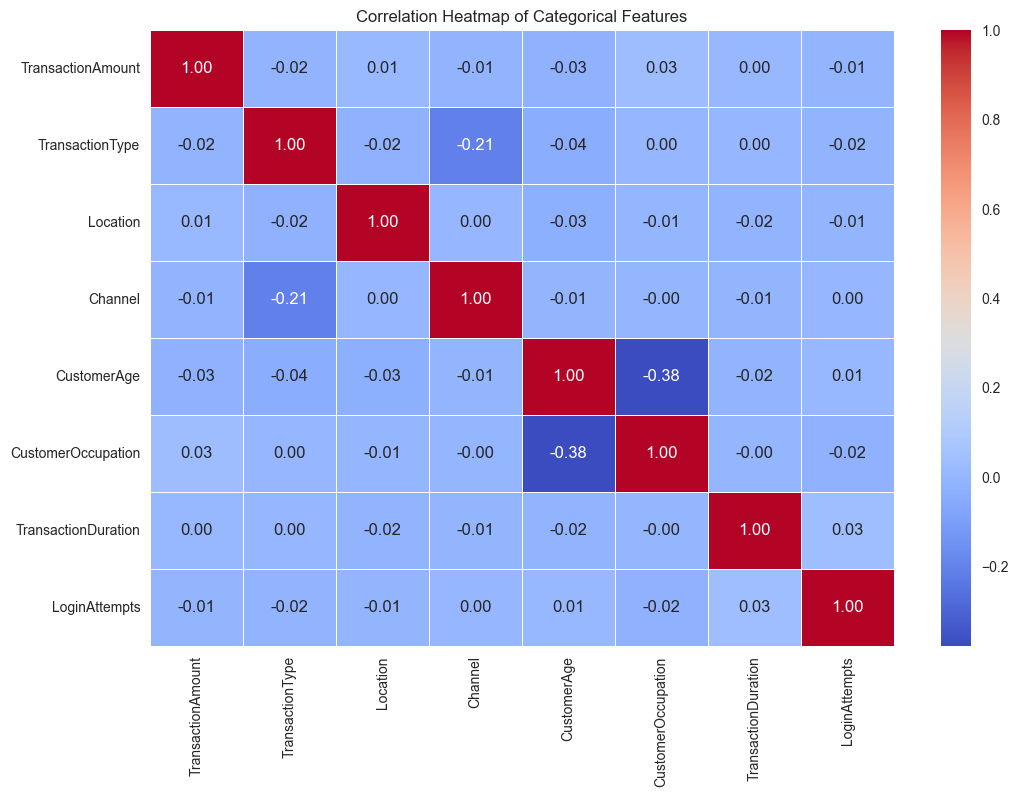

In [401]:
# Memilih kolom kategorikal yang relevan  
relevant_categorical_features = [  
    'TransactionType', 'Location', 'Channel', 'CustomerOccupation' 
]  

# Visualisasi dengan Countplot untuk setiap kolom relevan  
plt.figure(figsize=(15, 15))  
for i, column in enumerate(relevant_categorical_features, 1):  
    plt.subplot(4, 2, i)  
    sns.countplot(y=data[column], order=data[column].value_counts().index)  
    plt.title(f'Count of {column}')  
plt.tight_layout()  
plt.show()  

# Mengencode kolom kategorikal menjadi numerik untuk analisis korelasi  
data_encoded = data.copy()  
for column in relevant_categorical_features:  
    data_encoded[column] = data_encoded[column].astype('category').cat.codes  

# Memeriksa kolom numerik untuk heatmap  
num_columns = data_encoded.select_dtypes(include=[np.number]).columns.tolist()  

# Pembuatan matriks korelasi dan penggambaran heatmap  
corr_matrix = data_encoded[num_columns].corr()  
plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)  
plt.title('Correlation Heatmap of Categorical Features')  
plt.show()  

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [402]:
# Konversi Format Data  
# Mengubah tipe data pada kolom 'AccountBalance' menjadi float
data['AccountBalance'] = data['AccountBalance'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)  

# Mengubah tipe data pada kolom 'TransactionDate' dan 'PreviousTransactionDate' menjadi datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')  
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'], errors='coerce')  

print(data.info())  
print(data.describe(include='all'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [403]:
# 1. Menghapus Data Duplikat  
data = data.drop_duplicates()  
print(f"Jumlah entri setelah menghapus duplikat: {data.shape[0]}")  

Jumlah entri setelah menghapus duplikat: 2512


In [404]:
# 2. Binning  
# Binning TransactionAmount
data['TransactionAmountBinned'] = pd.cut(  
    data['TransactionAmount'],  
    bins=[-np.inf, 100, 500, 1000, 2000, np.inf],  
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']  
)
 
# Binning CustomerAge
data['CustomerAgeBinned'] = pd.cut(  
    data['CustomerAge'],  
    bins=[-np.inf, 25, 45, 65, np.inf],  
    labels=['Young', 'Middle Aged', 'Senior', 'Elderly']  # Added 'Elderly' label  
)  

# Binning untuk AccountBalance  
data['AccountBalanceBinned'] = pd.cut(  
    data['AccountBalance'],  
    bins=[-np.inf, 1000, 5000, 10000, np.inf],  
    labels=['Low', 'Medium', 'High', 'Very High']  
)  

# Binning untuk TransactionDuration  
data['TransactionDurationBinned'] = pd.cut(  
    data['TransactionDuration'],  
    bins=[-np.inf, 30, 120, 300, np.inf],  
    labels=['Fast', 'Normal', 'Slow', 'Very Slow']  
)  

# Binning untuk LoginAttempts  
data['LoginAttemptsBinned'] = pd.cut(  
    data['LoginAttempts'],  
    bins=[-np.inf, 1, 3, 5, np.inf],  
    labels=['Very Low', 'Low', 'Medium', 'High']  
)  

In [405]:
print(data.head()) 

  TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  ...  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM  ...   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM  ...   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online  ...   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online  ...   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online  ...   

   CustomerOccupation TransactionDuration  LoginAttempts  AccountBalance  \
0              Doctor       

In [406]:
# 3. Normalisasi atau Standarisasi Fitur  
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']  
scaler = StandardScaler()  
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])  


In [407]:
# 4. Mendeteksi Outlier menggunakan IQR  
outlier_info = {}  
for col in numerical_columns:  
    Q1 = data[col].quantile(0.25)  
    Q3 = data[col].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    
    # Identifikasi outlier  
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]  
    outlier_info[col] = outliers  
    print(f"Jumlah outlier di {col}: {outliers.shape[0]}")  

Jumlah outlier di TransactionAmount: 113
Jumlah outlier di CustomerAge: 0
Jumlah outlier di TransactionDuration: 0
Jumlah outlier di LoginAttempts: 122
Jumlah outlier di AccountBalance: 0


Menurut saya, outlier diatas tidak perlu dibersihkan. Karena kedua outlier (TransactionAmount dan LoginAttempts) bisa menjadi data yang valid dan merupakan salah satu upaya dalam aktivitas fraud.

In [408]:
# 5. Encoding Data Kategorikal dengan Label Encoding  
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']  
label_encoders = {}  
for col in categorical_columns:  
    le = LabelEncoder()  
    data[col] = le.fit_transform(data[col])  
    label_encoders[col] = le

In [409]:
print(data.info())  
print(data.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   TransactionID              2512 non-null   object        
 1   AccountID                  2512 non-null   object        
 2   TransactionAmount          2512 non-null   float64       
 3   TransactionDate            2512 non-null   datetime64[ns]
 4   TransactionType            2512 non-null   int64         
 5   Location                   2512 non-null   int64         
 6   DeviceID                   2512 non-null   object        
 7   IP Address                 2512 non-null   object        
 8   MerchantID                 2512 non-null   object        
 9   Channel                    2512 non-null   int64         
 10  CustomerAge                2512 non-null   float64       
 11  CustomerOccupation         2512 non-null   int64         
 12  Transa

In [410]:
output_file_path = 'pre_processing_dataset.csv'  

# Menyimpan DataFrame ke CSV  
data.to_csv(output_file_path, index=False)  

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [411]:
# 1. Pilih fitur untuk clustering  
# Menggunakan kolom yang sudah diproses sebelumnya  
features = [  
    'TransactionAmount',   
    'CustomerAge',   
    'AccountBalance',   
    'TransactionDuration',   
    'LoginAttempts',   
    'TransactionType',   
    'Location',   
    'Channel',   
    'CustomerOccupation'  
]  

# Mengambil kolom yang diperlukan dari dataset  
X = data[features].copy()  

In [412]:
# 3. Melatih model KMeans dengan jumlah cluster optimal  
k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)  
kmeans.fit(X)  

# Mendapatkan label cluster  
labels = kmeans.labels_  
data['Cluster'] = labels  # Menyimpan label cluster ke dalam DataFrame  

# Fungsi untuk menganalisis karakteristik cluster  
def analyze_clusters(X, labels, k):  
    print("Analisis Karakteristik Setiap Cluster:")  
    for cluster_id in range(k):  
        cluster_data = X[labels == cluster_id]  
        mean_values = cluster_data.mean()  
        print(f"\nCluster {cluster_id + 1}:")  
        print(mean_values)  

# Analisis karakteristik setiap cluster  
analyze_clusters(X, labels, k)  

# Menyimpan hasil ke dalam file baru  
data.to_csv('clustered_data.csv', index=False) 

Analisis Karakteristik Setiap Cluster:

Cluster 1:
TransactionAmount       0.020873
CustomerAge            -0.028599
AccountBalance          0.006464
TransactionDuration    -0.019796
LoginAttempts          -0.028721
TransactionType         0.761803
Location               34.370172
Channel                 1.003219
CustomerOccupation      1.510730
dtype: float64

Cluster 2:
TransactionAmount     -0.001338
CustomerAge            0.025824
AccountBalance         0.010034
TransactionDuration   -0.002681
LoginAttempts         -0.021637
TransactionType        0.793197
Location               6.032653
Channel                1.002721
CustomerOccupation     1.522449
dtype: float64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [413]:
# 1. Pilih fitur untuk clustering  
features = [  
    'TransactionAmount',   
    'CustomerAge',   
    'AccountBalance',   
    'TransactionDuration',   
    'LoginAttempts',   
    'TransactionType',   
    'Location',   
    'Channel',   
    'CustomerOccupation'  
]  

# Mengambil kolom yang diperlukan dari dataset  
X = data[features].copy()  

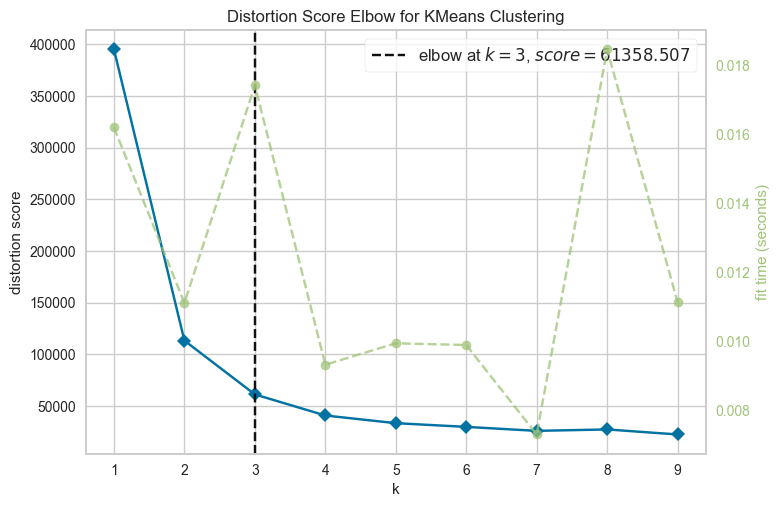

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [414]:
# 2. Elbow Method untuk menentukan jumlah cluster optimal  
kmeans = KMeans()  
visualizer = KElbowVisualizer(kmeans, k=(1, 10))  
visualizer.fit(X) 
# Menampilkan grafik elbow untuk analisis  
visualizer.show()  

In [415]:
# 3. Menentukan jumlah cluster optimal  
optimal_k = 3
print(f'Jumlah cluster optimal berdasarkan Elbow Method: {optimal_k}')  


Jumlah cluster optimal berdasarkan Elbow Method: 3


In [416]:
# 4. Melatih model KMeans dengan jumlah cluster optimal  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)  
kmeans.fit(X)  
# Mendapatkan label cluster  
labels = kmeans.labels_  
data['Cluster'] = labels  # Menyimpan label cluster ke dalam DataFrame  

In [417]:
# 5. Menghitung Silhouette Score  
silhouette_avg = silhouette_score(X, labels)  
print(f'Silhouette Score untuk {optimal_k} cluster: {silhouette_avg:.2f}')  

# Fungsi untuk menganalisis karakteristik cluster  
def analyze_clusters(X, labels, k):  
    print("Analisis Karakteristik Setiap Cluster:")  
    for cluster_id in range(k):  
        cluster_data = X[labels == cluster_id]  
        mean_values = cluster_data.mean()  
        print(f"\nCluster {cluster_id + 1}:")  
        print(mean_values)  

# Analisis karakteristik setiap cluster  
analyze_clusters(X, labels, optimal_k)  

# Menyimpan hasil ke dalam file baru  
data.to_csv('clustered_data.csv', index=False)  # Menyimpan dataset dengan label cluster  

Silhouette Score untuk 3 cluster: 0.49
Analisis Karakteristik Setiap Cluster:

Cluster 1:
TransactionAmount       0.020873
CustomerAge            -0.028599
AccountBalance          0.006464
TransactionDuration    -0.019796
LoginAttempts          -0.028721
TransactionType         0.761803
Location               34.370172
Channel                 1.003219
CustomerOccupation      1.510730
dtype: float64

Cluster 2:
TransactionAmount     -0.001338
CustomerAge            0.025824
AccountBalance         0.010034
TransactionDuration   -0.002681
LoginAttempts         -0.021637
TransactionType        0.793197
Location               6.032653
Channel                1.002721
CustomerOccupation     1.522449
dtype: float64

Cluster 3:
TransactionAmount      -0.021858
CustomerAge             0.009081
AccountBalance         -0.015857
TransactionDuration     0.024166
LoginAttempts           0.050499
TransactionType         0.770414
Location               19.369231
Channel                 0.968047
Custome

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [418]:
# 1. Load data  

# Memastikan kolom yang digunakan untuk feature selection  
features = [  
    'TransactionAmount',   
    'CustomerAge',   
    'AccountBalance',   
    'TransactionDuration',   
    'LoginAttempts',   
    'TransactionType',   
    'Location',   
    'Channel',   
    'CustomerOccupation'  
]  

In [419]:
# 2. Menyiapkan fitur dan label berdasarkan hasil clustering  
X = data[features].copy()  
y = data['Cluster']  # Menggunakan label cluster yang telah ada  

# 3. Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [420]:
# 4. Menggunakan Random Forest untuk mendapatkan fitur penting  
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)  

# Mendapatkan fitur penting  
importances = rf_model.feature_importances_  
indices = np.argsort(importances)[::-1]  

# Menentukan ambang batas untuk fitur penting  
threshold = 0.01  # Ambang batas yang lebih rendah  
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]  

# Memindahkan fitur penting ke variabel baru  
X_important = X.iloc[:, important_features_indices].values  

# Menampilkan fitur yang dipilih  
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")  
for i in important_features_indices:  
    print(f"{features[i]}: {importances[i]:.4f}")  # Menampilkan nilai penting fitur dengan format  

print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)  

# Definisikan fungsi evaluasi  
def evaluate_model(X_train, X_test, y_train, y_test, model):  
    model.fit(X_train, y_train)  
    predictions = model.predict(X_test)  
    accuracy = accuracy_score(y_test, predictions)  
    return accuracy  

# Evaluasi Model dengan fitur terpilih  
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)  
accuracy_rf = evaluate_model(X_train.iloc[:, important_features_indices], X_test.iloc[:, important_features_indices], y_train, y_test, rf_model_selected)  

print(f"Akurasi Model dengan Fitur Terpilih: {accuracy_rf:.2f}")  

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
TransactionAmount: 0.0161
CustomerAge: 0.0121
AccountBalance: 0.0152
TransactionDuration: 0.0142
Location: 0.9330

Dimensi data pelatihan dengan fitur penting: (2512, 5)
Akurasi Model dengan Fitur Terpilih: 1.00


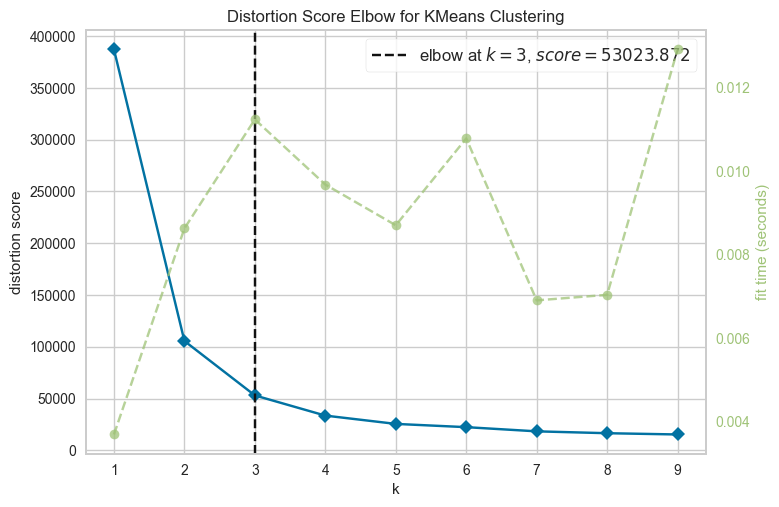

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [427]:
# 5. Clustering dengan KMeans pada fitur terpilih  
kmeans = KMeans()  
visualizer = KElbowVisualizer(kmeans, k=(1, 10))  
visualizer.fit(X_important)  # Menggunakan data fitur penting  

# Menampilkan grafik elbow untuk analisis  
visualizer.show() 

In [429]:
# Menentukan jumlah cluster optimal  
optimal_k = 3 
print(f'Jumlah cluster optimal berdasarkan Elbow Method: {optimal_k}')  

# Melatih model KMeans dengan jumlah cluster optimal  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)  
kmeans.fit(X_important)  

# Mendapatkan label cluster  
labels = kmeans.labels_  

# 6. Menghitung Silhouette Score  
silhouette_avg = silhouette_score(X, labels)  
print(f'Silhouette Score untuk {optimal_k} cluster: {silhouette_avg:.2f}')  

# Fungsi untuk menganalisis karakteristik cluster  
def analyze_clusters(X, labels, k):  
    print("Analisis Karakteristik Setiap Cluster:")  
    for cluster_id in range(k):  
        cluster_data = X[labels == cluster_id]  
        mean_values = cluster_data.mean()  
        print(f"\nCluster {cluster_id + 1}:")  
        print(mean_values)  

# Analisis karakteristik setiap cluster  
analyze_clusters(X, labels, optimal_k)  

# Menyimpan hasil ke dalam file baru  
data['Cluster'] = labels
data.to_csv('clustered_data_with_selected_features.csv', index=False)  # Menyimpan dataset dengan label cluster  

Jumlah cluster optimal berdasarkan Elbow Method: 3
Silhouette Score untuk 3 cluster: 0.52
Analisis Karakteristik Setiap Cluster:

Cluster 1:
TransactionAmount       0.020873
CustomerAge            -0.028599
AccountBalance          0.006464
TransactionDuration    -0.019796
Location               34.370172
dtype: float64

Cluster 2:
TransactionAmount      -0.021858
CustomerAge             0.009081
AccountBalance         -0.015857
TransactionDuration     0.024166
Location               19.369231
dtype: float64

Cluster 3:
TransactionAmount     -0.001338
CustomerAge            0.025824
AccountBalance         0.010034
TransactionDuration   -0.002681
Location               6.032653
dtype: float64


Membandingkan hasil clustering tanpa feature selection dengan hasil clustering dengan feature selection

In [ ]:
import pandas as pd  

# Load kedua dataset  
file_path_1 = 'clustered_data.csv'                    
file_path_2 = 'clustered_data_with_selected_features.csv' 

data_without_fs = pd.read_csv(file_path_1)  
data_with_fs = pd.read_csv(file_path_2)  

# Menampilkan informasi dasar kedua dataset  
print("Informasi Dataset Tanpa Fitur Seleksi:")  
print(data_without_fs.info())  
print("\nInformasi Dataset Dengan Fitur Seleksi:")  
print(data_with_fs.info())  

# Menghitung jumlah data untuk setiap cluster pada dataset tanpa fitur seleksi  
cluster_counts_without_fs = data_without_fs['Cluster'].value_counts().sort_index()  
print("\nJumlah Data untuk Setiap Cluster (Tanpa Fitur Seleksi):")  
print(cluster_counts_without_fs)  

# Menghitung jumlah data untuk setiap cluster pada dataset dengan fitur seleksi  
cluster_counts_with_fs = data_with_fs['Cluster'].value_counts().sort_index()  
print("\nJumlah Data untuk Setiap Cluster (Dengan Fitur Seleksi):")  
print(cluster_counts_with_fs)  

# Menghitung total data untuk kedua dataset  
total_data_without_fs = data_without_fs.shape[0]  
total_data_with_fs = data_with_fs.shape[0]  
print(f"\nTotal data (Tanpa Fitur Seleksi): {total_data_without_fs}")  
print(f"Total data (Dengan Fitur Seleksi): {total_data_with_fs}")  

# Menampilkan rata-rata dan median dari TransactionAmount untuk setiap cluster  
def cluster_summary(data, cluster_column='Cluster', value_column='TransactionAmount'):  
    return data.groupby(cluster_column)[value_column].agg(['mean', 'median', 'count']).reset_index()  

summary_without_fs = cluster_summary(data_without_fs)  
summary_with_fs = cluster_summary(data_with_fs)  

print("\nRata-rata dan Median TransactionAmount per Cluster (Tanpa Fitur Seleksi):")  
print(summary_without_fs)  

print("\nRata-rata dan Median TransactionAmount per Cluster (Dengan Fitur Seleksi):")  
print(summary_with_fs)  

Informasi Dataset Tanpa Fitur Seleksi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TransactionID              2512 non-null   object 
 1   AccountID                  2512 non-null   object 
 2   TransactionAmount          2512 non-null   float64
 3   TransactionDate            2512 non-null   object 
 4   TransactionType            2512 non-null   int64  
 5   Location                   2512 non-null   int64  
 6   DeviceID                   2512 non-null   object 
 7   IP Address                 2512 non-null   object 
 8   MerchantID                 2512 non-null   object 
 9   Channel                    2512 non-null   int64  
 10  CustomerAge                2512 non-null   float64
 11  CustomerOccupation         2512 non-null   int64  
 12  TransactionDuration        2512 non-null   float64
 13  LoginAtte

Tanpa Fitur Seleksi  
| Cluster |    Mean    |   Median   | Count |  
|---------|------------|------------|-------|  
|    0    |  0.020873  | -0.318491  |  932  |  
|    1    | -0.001338  | -0.284540  |  735  |  
|    2    | -0.021858  | -0.295434  |  845  |  

- **Silhouette Score untuk 3 Cluster**: **0.49**  

Dengan Fitur Seleksi  
| Cluster |    Mean    |   Median   | Count |  
|---------|------------|------------|-------|  
|    0    |  0.020873  | -0.318491  |  932  |  
|    1    | -0.021858  | -0.295434  |  845  |  
|    2    | -0.001338  | -0.284540  |  735  |  

- **Silhouette Score untuk 3 Cluster**: **0.52**  
 
Dapat dilihat bahwa setelah dilakukan seleksi fitur, nilai **Silhouette Score** meningkat dari **0.49** menjadi **0.52**. Hal ini menunjukkan bahwa seleksi fitur membantu dalam peningkatan performa model.   

Hasil juga menunjukkan adanya pergeseran data, di mana pada cluster tanpa fitur seleksi, **Cluster 1** memiliki **735 data**, sedangkan pada cluster dengan fitur seleksi, **Cluster 1** memiliki **845 data**. Begitu juga dengan **Cluster 2**.  

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [422]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [423]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [424]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [425]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.